#Zomato data analysis

# Importing Libraries
- Pandas is used for data manipulation and analysis
- numpy is used for numberical operation
- matplotlib.pyplot and seabord are used for data visualization


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a data frame

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# convert the data type of column - rate

In [8]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
dataframe.info() # find if there is any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
# QUESTION = What type of restaurant do the majority of customers order from?
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturant')

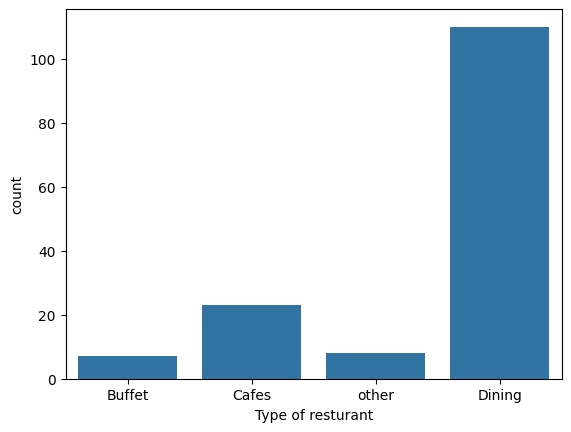

In [11]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of resturant')

# conclusion - majority of the restaurant falls in dinning category

Text(0, 0.5, 'Votes')

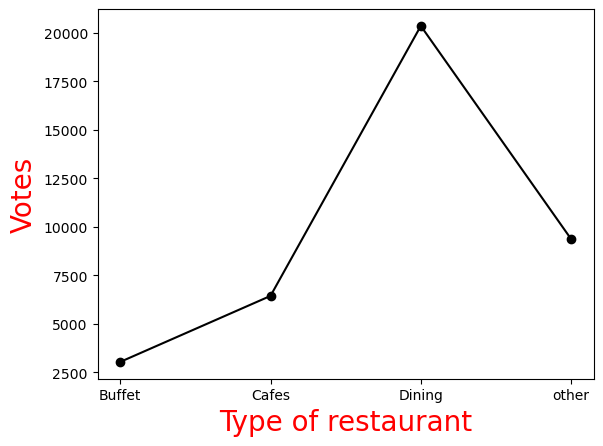

In [8]:
## QUESTION = How many votes has each type of restaurant recived from the customer
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c = 'black', marker="o")
plt.xlabel('Type of restaurant', c = 'red', size=20)
plt.ylabel("Votes", c="red", size=20)

## conclusion - dinning restaurants has recieved maximum votes

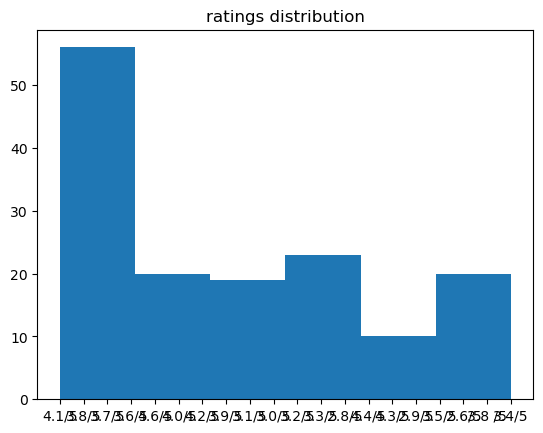

In [20]:
# QUESTION - what are the ratings that the majority of restaurant have recieved
plt.hist(dataframe['rate'],bins =6)
plt.title("ratings distribution")
plt.show()

## conclusion - the majority restuarants recieved ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

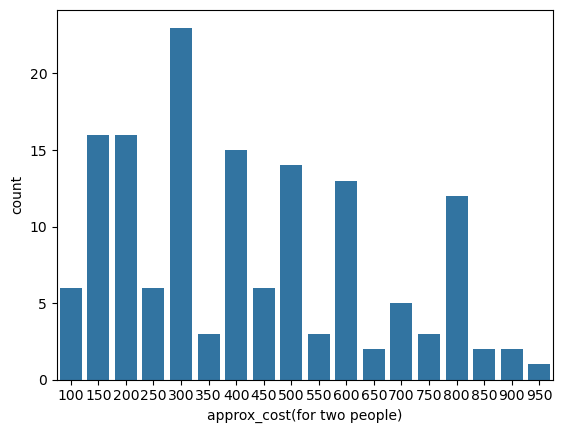

In [22]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion - the majority of couples preferr restaurants with an approximate cost of 300 rupees

In [23]:
#QUESTION - which mode (online or offline) has recieved the maximum rating? 
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

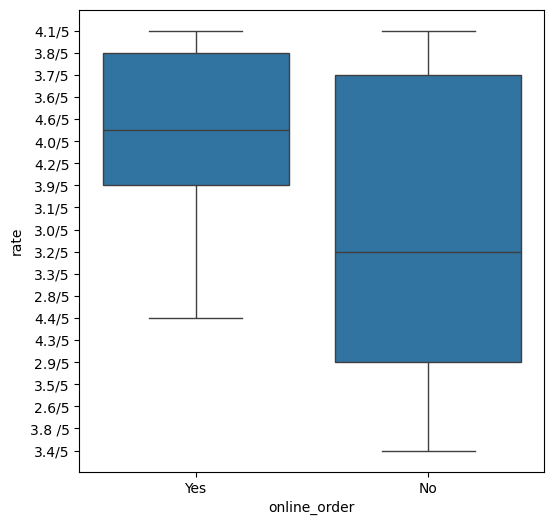

In [24]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

## conclusion - offline order recieved lower rating in comparison to online order